In [273]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime

In [274]:
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv"

In [275]:
df = pd.read_csv(url, sep=';')


In [276]:
#1.1.
#Dato: se om det er helg/hverdag
#Ankomst/avgang: regne ut tid på stoppested
#PlanlagtAnkomst/FaktiskAnkomst: regne ut forsinkelser
#Passasjer_Ombord/Kjøretøy_Kapasitet: hvor mange ledige seter?
#Dato: se hvilken årstid det er


In [277]:
#1.2.

In [278]:
#Dato: se om det er helg/hverdag
df['Dato'] =pd.to_datetime(df['Dato'], errors='coerce')
df['Ukedag_Helg'] = df['Dato'].dt.dayofweek
df["Ukedag_Helg"] = df["Ukedag_Helg"].replace([0,1,2,3,4], "Ukedag")
df["Ukedag_Helg"] = df["Ukedag_Helg"].replace([5,6], "Helg")
df


,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Ukedag_Helg
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,Ukedag
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5,Helg
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6,Helg
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10,Ukedag
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10,Ukedag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,2020-10-06,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,1,16:23:18,16:23:48,16:10:00,16:10:00,151,2,Ukedag
5996,10010-2020-06-23T05:54:00+02:00,2020-06-23,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,0,06:00:32,06:00:40,05:59:00,05:59:00,151,2,Ukedag
5997,2007-2020-06-11T17:22:00+02:00,2020-11-06,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,1,17:42:43,17:43:10,17:32:00,17:32:00,106,3,Ukedag
5998,10004-2020-08-13T04:59:00+02:00,2020-08-13,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,0,06:00:11,06:00:23,05:59:00,05:59:00,151,5,Ukedag


In [279]:
#Ankomst/avgang: regne ut tid på stoppested
df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'], errors='coerce')
df['Tid_På_Stoppested'] = df["Tidspunkt_Faktisk_Avgang_Holdeplass_Fra"]-df["Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra"]


In [280]:
df['Tid_På_Stoppested'] = df['Tid_På_Stoppested'].dt.total_seconds()


In [281]:
conditions = [
    (df['Tid_På_Stoppested'] >= 0) & (df['Tid_På_Stoppested'] < 10),
    (df['Tid_På_Stoppested'] >= 10) & (df['Tid_På_Stoppested'] < 20),
    (df['Tid_På_Stoppested'] >= 20) & (df['Tid_På_Stoppested'] < 30),
    (df['Tid_På_Stoppested'] >= 30) & (df['Tid_På_Stoppested'] < 40),
    (df['Tid_På_Stoppested'] >= 40) & (df['Tid_På_Stoppested'] < 50),
    (df['Tid_På_Stoppested'] >= 50) 
]

values=['0-10sek', '10-20sek', '20-30sek', '30-40sek', '40-50sek', '50+']

df['Tid_På_Sted_Gruppe'] = np.select(conditions, values)
df

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Ukedag_Helg,Tid_På_Stoppested,Tid_På_Sted_Gruppe
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,2021-09-27 10:53:53,2021-09-27 10:53:59,10:53:00,10:53:00,112,5,Ukedag,6.0,0-10sek
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,2021-09-27 13:12:20,2021-09-27 13:12:26,13:12:00,13:12:00,112,5,Helg,6.0,0-10sek
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,2021-09-27 10:18:56,2021-09-27 10:19:21,10:19:00,10:19:00,112,6,Helg,25.0,20-30sek
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,2021-09-27 13:52:04,2021-09-27 13:52:26,13:51:00,13:51:00,112,10,Ukedag,22.0,20-30sek
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,2021-09-27 07:34:13,2021-09-27 07:34:53,07:33:00,07:33:00,112,10,Ukedag,40.0,40-50sek
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,2020-10-06,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,1,2021-09-27 16:23:18,2021-09-27 16:23:48,16:10:00,16:10:00,151,2,Ukedag,30.0,30-40sek
5996,10010-2020-06-23T05:54:00+02:00,2020-06-23,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,0,2021-09-27 06:00:32,2021-09-27 06:00:40,05:59:00,05:59:00,151,2,Ukedag,8.0,0-10sek
5997,2007-2020-06-11T17:22:00+02:00,2020-11-06,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,1,2021-09-27 17:42:43,2021-09-27 17:43:10,17:32:00,17:32:00,106,3,Ukedag,27.0,20-30sek
5998,10004-2020-08-13T04:59:00+02:00,2020-08-13,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,0,2021-09-27 06:00:11,2021-09-27 06:00:23,05:59:00,05:59:00,151,5,Ukedag,12.0,10-20sek


In [282]:
#PlanlagtAnkomst/FaktiskAnkomst: regne ut forsinkelser
df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'], errors='coerce')
df['Forsinkelse'] = df["Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra"]-df["Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra"]


In [283]:
df['Forsinkelse'] = df['Forsinkelse'].dt.total_seconds()

In [284]:
conditions = [
    (df['Forsinkelse'] < 0),
    (df['Forsinkelse'] >= 0) & (df['Forsinkelse'] < 60),
    (df['Forsinkelse'] >= 60)
]

values=['Tidlig', 'Presis', 'Sen']

df['ForsinkelseGruppe'] = np.select(conditions, values)
df

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Ukedag_Helg,Tid_På_Stoppested,Tid_På_Sted_Gruppe,Forsinkelse,ForsinkelseGruppe
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,2021-09-27 10:53:59,2021-09-27 10:53:00,10:53:00,112,5,Ukedag,6.0,0-10sek,53.0,Presis
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,2021-09-27 13:12:26,2021-09-27 13:12:00,13:12:00,112,5,Helg,6.0,0-10sek,20.0,Presis
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,2021-09-27 10:19:21,2021-09-27 10:19:00,10:19:00,112,6,Helg,25.0,20-30sek,-4.0,Tidlig
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,2021-09-27 13:52:26,2021-09-27 13:51:00,13:51:00,112,10,Ukedag,22.0,20-30sek,64.0,Sen
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,2021-09-27 07:34:53,2021-09-27 07:33:00,07:33:00,112,10,Ukedag,40.0,40-50sek,73.0,Sen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,2020-10-06,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,...,2021-09-27 16:23:48,2021-09-27 16:10:00,16:10:00,151,2,Ukedag,30.0,30-40sek,798.0,Sen
5996,10010-2020-06-23T05:54:00+02:00,2020-06-23,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,...,2021-09-27 06:00:40,2021-09-27 05:59:00,05:59:00,151,2,Ukedag,8.0,0-10sek,92.0,Sen
5997,2007-2020-06-11T17:22:00+02:00,2020-11-06,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,...,2021-09-27 17:43:10,2021-09-27 17:32:00,17:32:00,106,3,Ukedag,27.0,20-30sek,643.0,Sen
5998,10004-2020-08-13T04:59:00+02:00,2020-08-13,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,...,2021-09-27 06:00:23,2021-09-27 05:59:00,05:59:00,151,5,Ukedag,12.0,10-20sek,71.0,Sen


In [285]:
#Passasjer_Ombord/Kjøretøy_Kapasitet: hvor mange ledige seter?
df['Plasser_Ikke_I_Bruk'] = df["Kjøretøy_Kapasitet"] - df["Passasjerer_Ombord"]
df['Plasser_Ikke_I_Bruk_Prosent'] = (100 * df["Plasser_Ikke_I_Bruk"])/df["Kjøretøy_Kapasitet"]
df['Plasser_Ikke_I_Bruk_Prosent'] = df['Plasser_Ikke_I_Bruk_Prosent'].round(decimals=0)
df

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Ukedag_Helg,Tid_På_Stoppested,Tid_På_Sted_Gruppe,Forsinkelse,ForsinkelseGruppe,Plasser_Ikke_I_Bruk,Plasser_Ikke_I_Bruk_Prosent
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,10:53:00,112,5,Ukedag,6.0,0-10sek,53.0,Presis,107,96.0
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,13:12:00,112,5,Helg,6.0,0-10sek,20.0,Presis,107,96.0
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,10:19:00,112,6,Helg,25.0,20-30sek,-4.0,Tidlig,106,95.0
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,13:51:00,112,10,Ukedag,22.0,20-30sek,64.0,Sen,102,91.0
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,07:33:00,112,10,Ukedag,40.0,40-50sek,73.0,Sen,102,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,2020-10-06,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,...,16:10:00,151,2,Ukedag,30.0,30-40sek,798.0,Sen,149,99.0
5996,10010-2020-06-23T05:54:00+02:00,2020-06-23,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,...,05:59:00,151,2,Ukedag,8.0,0-10sek,92.0,Sen,149,99.0
5997,2007-2020-06-11T17:22:00+02:00,2020-11-06,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,...,17:32:00,106,3,Ukedag,27.0,20-30sek,643.0,Sen,103,97.0
5998,10004-2020-08-13T04:59:00+02:00,2020-08-13,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,...,05:59:00,151,5,Ukedag,12.0,10-20sek,71.0,Sen,146,97.0


In [286]:
#Dato: se hvilken årstid det er
df['Årstid'] = df['Dato'].dt.month
df["Årstid"] = df["Årstid"].replace([12,1,2], "Vinter")
df["Årstid"] = df["Årstid"].replace([3,4,5], "Vår")
df["Årstid"] = df["Årstid"].replace([6,7,8], "Sommer")
df["Årstid"] = df["Årstid"].replace([9,10,11], "Høst")
df

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Kjøretøy_Kapasitet,Passasjerer_Ombord,Ukedag_Helg,Tid_På_Stoppested,Tid_På_Sted_Gruppe,Forsinkelse,ForsinkelseGruppe,Plasser_Ikke_I_Bruk,Plasser_Ikke_I_Bruk_Prosent,Årstid
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,112,5,Ukedag,6.0,0-10sek,53.0,Presis,107,96.0,Høst
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,112,5,Helg,6.0,0-10sek,20.0,Presis,107,96.0,Sommer
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,112,6,Helg,25.0,20-30sek,-4.0,Tidlig,106,95.0,Vår
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,112,10,Ukedag,22.0,20-30sek,64.0,Sen,102,91.0,Sommer
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,112,10,Ukedag,40.0,40-50sek,73.0,Sen,102,91.0,Sommer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,2020-10-06,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,...,151,2,Ukedag,30.0,30-40sek,798.0,Sen,149,99.0,Høst
5996,10010-2020-06-23T05:54:00+02:00,2020-06-23,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,...,151,2,Ukedag,8.0,0-10sek,92.0,Sen,149,99.0,Sommer
5997,2007-2020-06-11T17:22:00+02:00,2020-11-06,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,...,106,3,Ukedag,27.0,20-30sek,643.0,Sen,103,97.0,Høst
5998,10004-2020-08-13T04:59:00+02:00,2020-08-13,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,...,151,5,Ukedag,12.0,10-20sek,71.0,Sen,146,97.0,Sommer


In [287]:
#1.3.

In [288]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

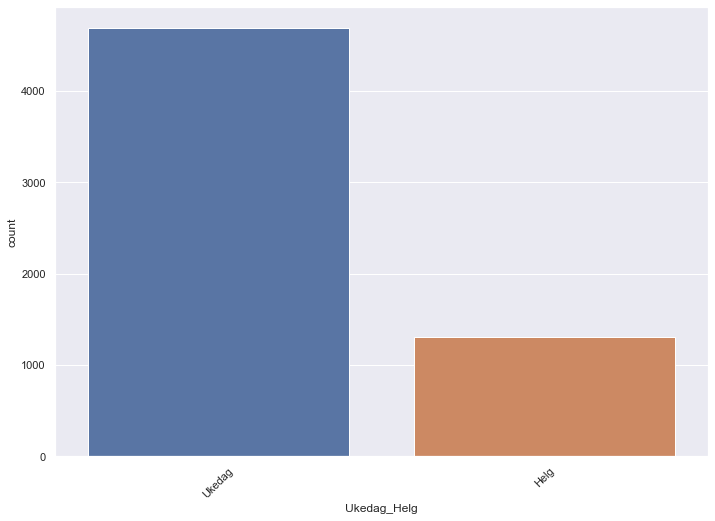

In [289]:
#Dag_Helg
sns.countplot(x='Ukedag_Helg', data=df);
plt.xticks(rotation=45);

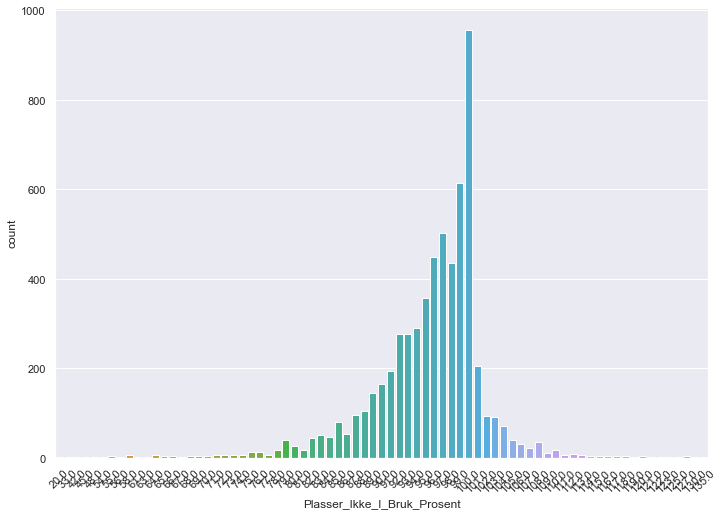

In [290]:
#Plasser_Ikke_I_Bruk_Prosent
sns.countplot(x='Plasser_Ikke_I_Bruk_Prosent', data=df);
plt.xticks(rotation=45);

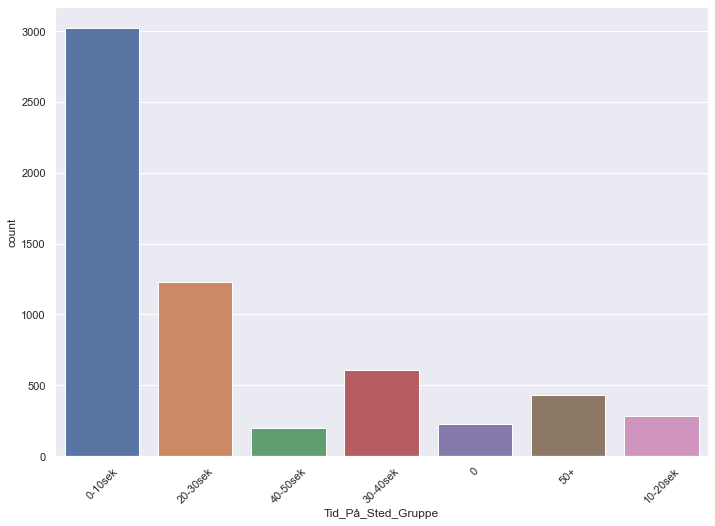

In [291]:
#Tid_På_Sted_Gruppe
sns.countplot(x='Tid_På_Sted_Gruppe', data=df);
plt.xticks(rotation=45);

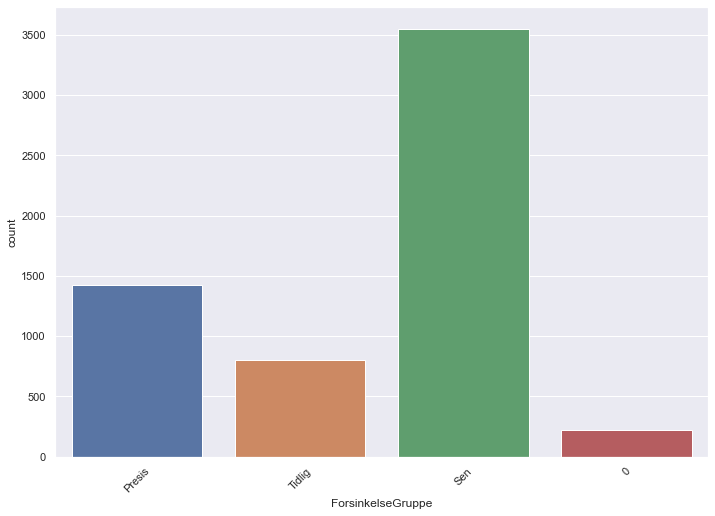

In [292]:
#ForsinkelseGruppe
sns.countplot(x='ForsinkelseGruppe', data=df);
plt.xticks(rotation=45);

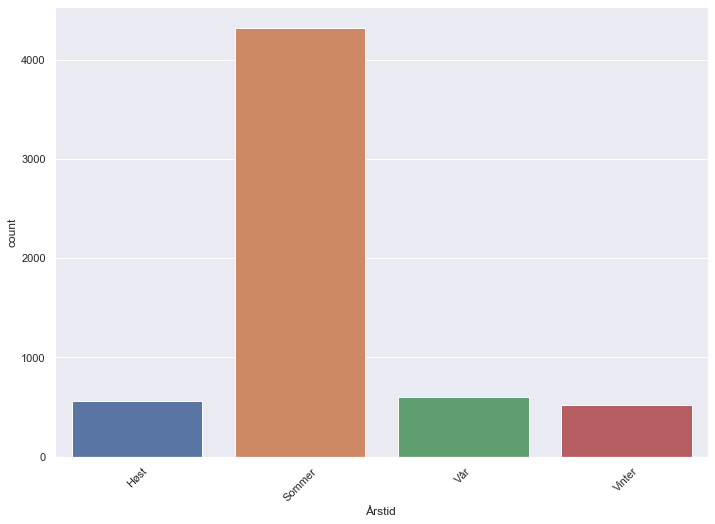

In [293]:
#Årstid
sns.countplot(x='Årstid', data=df);
plt.xticks(rotation=45);